<a href="https://colab.research.google.com/github/Ansalgadulu/python_ML/blob/main/driver_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib_inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv")
df.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
len(df),min(df["Unnamed: 0"]),max(df["Unnamed: 0"])##check if there is any difeerence between index and unnamed

(19104, 0, 19103)

The data we have is monthly data for drivers enrolled under Ola .
We have the following features for each of the drivers:
1.	MMMM-YY : Reporting Date (Monthly)
2.	Driver_ID : Unique id for drivers
3.	Age : Age of the driver
4.	Gender : Gender of the driver – Male : 0, Female: 1
5.	City : City Code of the driver
6.	Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7.	Income : Monthly average Income of the driver
8.	Date Of Joining : Joining date for the driver
9.	LastWorkingDate : Last date of working for the driver
10.	Joining Designation : Designation of the driver at the time of joining
11.	Grade : Grade of the driver at the time of reporting
12.	Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
13.	Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

##Our Goal for this study is to create a ML model using bagging and boosting techniques for decision trees to predict if a driver is going to leave the buisness and what are the major factors leading to the same.

In [ ]:
# we can drop the #unnamed row as it is the same a index
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
df.describe()


,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


##Aggregation of data to get driver level data

In [ ]:
df["MMM-YY"]= pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"]= pd.to_datetime(df["Dateofjoining"])
range_date=(max(df["MMM-YY"])-min(df["MMM-YY"]))
max_date=max(df["MMM-YY"])
min_date=min(df["MMM-YY"])
print(f"The data has a range of {range_date} minimum date is {min_date},maximum date is {max_date}")
#The ola data is for aroung 2 years 2019 and 2020

The data has a range of 700 days 00:00:00 minimum date is 2019-01-01 00:00:00,maximum date is 2020-12-01 00:00:00


In [ ]:
#Lets check if there is any increase in driver Income, grade and quaterly rating
temp_income=df.groupby('Driver_ID')['Income'].first()-df.groupby('Driver_ID')['Income'].last()
temp_income=temp_income.reset_index()
temp_income[temp_income['Income']>0]#there are no rows where the driver income is increasing so we cannot use this as a feature


,Driver_ID,Income


In [ ]:
col_increase=["Income",'Grade','Quarterly Rating',"Education_Level","Joining Designation"]
for i in col_increase:
  temp=df.groupby('Driver_ID')[i].first()-df.groupby('Driver_ID')[i].last()
  temp=temp.reset_index()
  no_of_rows_increasing=len(temp[temp[i]>0])
  no_of_rows_decreasing=len(temp[temp[i]<0])
  print(f"{i} : increase {no_of_rows_increasing},decrease {no_of_rows_decreasing}")
  #there is a inrease in quaterly rating for 458 rows we can have a additional feature which indicates if a driver's quaterly ratings are increasing or decreasing

Income : increase 0,decrease 43
Grade : increase 0,decrease 43
Quarterly Rating : increase 458,decrease 358
Education_Level : increase 0,decrease 0
Joining Designation : increase 0,decrease 0


In [ ]:
#Creaing a new data frame which can later be merged with our original data frame capturing the increase and decrease of features

income=df.groupby('Driver_ID')['Income'].first()-df.groupby('Driver_ID')["Income"].last()
grade=df.groupby('Driver_ID')['Grade'].first()-df.groupby('Driver_ID')["Grade"].last()
Quaterly_rat=df.groupby('Driver_ID')['Quarterly Rating'].first()-df.groupby('Driver_ID')["Quarterly Rating"].last()
income=income.reset_index()
grade=grade.reset_index()
Quaterly_rat=Quaterly_rat.reset_index()


In [ ]:
temp_df=pd.merge(income, grade,on ="Driver_ID",how='inner')
df_new=pd.merge(temp_df, Quaterly_rat,on ="Driver_ID",how='inner')
#lets make the values as if income is decreasing as 1 and 0 if no change
#grade if decreasing then 1 or 0 for no change
#Quaterly rating 1 if increasing 0 if no change -1 if decreasing
df_new.loc[(df_new['Income'] <0),'Income']=1
df_new.loc[(df_new['Grade'] <0),'Grade']=1
df_new.loc[(df_new['Quarterly Rating'] <0),'Quarterly Rating']=-1
df_new.loc[(df_new['Quarterly Rating'] >0),'Quarterly Rating']=1
df_join=df_new
df_join.rename(columns = {'Income':'Income_decrease'}, inplace = True)
df_join.rename(columns = {'Grade':'Grade_decrease'}, inplace = True)
df_join.rename(columns = {'Quarterly Rating':'Rating_increase'}, inplace = True)
df_join.head()

,Driver_ID,Income_decrease,Grade_decrease,Rating_increase
0,1,0,0,0
1,2,0,0,0
2,4,0,0,0
3,5,0,0,0
4,6,0,0,-1


In [ ]:
for i in ["Income_decrease",'Grade_decrease','Rating_increase']:
  print(df_new[i].value_counts())
  #we have now changed the values for the new df_new as intended

0    2338
1      43
Name: Income_decrease, dtype: int64
0    2338
1      43
Name: Grade_decrease, dtype: int64
 0    1565
 1     458
-1     358
Name: Rating_increase, dtype: int64


In [ ]:
#lets have another feature as avreage amount of monthly rides for each driver,
#lets create a new feature named month
df["month"]=df["MMM-YY"].dt.month
df["year"]=df["MMM-YY"].dt.year

temp=df.groupby("Driver_ID")['month'].count().reset_index()
temp=temp.groupby("Driver_ID")["month"].mean()
avg_rides=temp.reset_index()
avg_rides.rename(columns = {'month':'number_month'}, inplace = True)
avg_rides.head(5)

,Driver_ID,number_month
0,1,3.0
1,2,2.0
2,4,5.0
3,5,3.0
4,6,5.0


In [ ]:
#lets add avg_rides to df_join as we will be adding that to our df_final after aggregation
df_join=pd.merge(df_join, avg_rides,on ="Driver_ID",how='outer')

In [ ]:
# we have multiple records for each driver most probably daily data
#we have to aggregate the data to a driver level as this is what we need to check to create single point of data for our model
agg_dic={'Age':"last","Gender":"last","City":"last","Education_Level":"last","Income":"last","Dateofjoining":"first","Joining Designation":"first","Grade":"last","Total Business Value":"sum","Quarterly Rating":"mean","LastWorkingDate":"last"}
#I am creating df_final as i will be dropping the date column which i might need later for analysis
df_final=df.groupby("Driver_ID").agg(agg_dic).reset_index()
df_final["Quarterly Rating"]=np.round(df_final["Quarterly Rating"],0)
df_final.head()


,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,LastWorkingDate
0,1,28.0,0.0,C23,2,57387,2018-12-24,1,1,1715580,2.0,03/11/19
1,2,31.0,0.0,C7,2,67016,2020-11-06,2,2,0,1.0,None
2,4,43.0,0.0,C13,2,65603,2019-12-07,2,2,350000,1.0,27/04/20
3,5,29.0,0.0,C9,0,46368,2019-01-09,1,1,120360,1.0,03/07/19
4,6,31.0,1.0,C11,1,78728,2020-07-31,3,3,1265000,2.0,None


In [ ]:
#lets join our df_join with Df_final
df_final=pd.merge(df_final, df_join,on ="Driver_ID",how='outer')
#preparing target variable
df_final["LastWorkingDate"].fillna(0,inplace=True)
df_final.loc[(df_final['LastWorkingDate'] !=0),'LastWorkingDate']=1
df_final.rename(columns = {'LastWorkingDate':'Target'}, inplace = True)
df_final['Target'].value_counts(normalize=True)

1    0.678706
0    0.321294
Name: Target, dtype: float64

##There were no missing values found after aggregation hence we can skip the part where we check and fix missing values

In [ ]:
df_final.isna().sum()#there are no missing values after aggregation

Driver_ID               0
Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Dateofjoining           0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
Target                  0
Income_decrease         0
Grade_decrease          0
Rating_increase         0
number_month            0
dtype: int64

In [ ]:
# encoding city and date of joining
# Lets convert date of joining to month & year of joining
df_final['month_of_join']=df_final["Dateofjoining"].dt.month
df_final['year_of_join']=df_final["Dateofjoining"].dt.year
df_final.drop("Dateofjoining",axis=1,inplace=True)

In [ ]:
df_final.describe()
#we can see that the there is not much severe difference mean and max for features like  Age, Income but Total buinsess value  & number_month seems to have some difference in mean and median

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Income_decrease,Grade_decrease,Rating_increase,number_month,month_of_join,year_of_join
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000
mean,1397.559009,33.663167,0.410332,1.00756,59334.157077,1.820244,2.096598,4.586742e+06,1.573289,0.018060,0.018060,0.041999,8.02352,7.357413,2018.536329
std,806.161628,5.983375,0.491997,0.81629,28383.666384,0.841433,0.941522,9.127115e+06,0.745987,0.133195,0.133195,0.584031,6.78359,3.143143,1.609597
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,-1.000000,1.00000,1.000000,2013.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,3.00000,5.000000,2018.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,0.000000,0.000000,5.00000,7.000000,2019.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,0.000000,0.000000,0.000000,10.00000,10.000000,2020.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000,24.00000,12.000000,2020.000000


#Check for outliers

In [ ]:
def iqr(x):
  q3=df_final[x].quantile(0.75)
  q2=df_final[x].quantile(0.25)
  iqr=q3-q2
  low=q2-1.5*iqr
  high=q3+1.5*iqr
  return {"low":low,'high':high,"no.of outlier":(len(df_final[df_final[x]>high])),"max of outlier":df_final[df_final[x]>high][x].max(),"mean of the outliers":(df_final[df_final[x]>high][x].mean())}

In [ ]:
col_num=['Age',"Income","Total Business Value"]
for i in col_num:
  print(f"{i} : {iqr(i)}")
#We can that for Age the difference in the top IQR range and the mean and max of outliers isnt much so I am not treating the outliers.
#For income and Total buisness value lets replace the outliers with the 90th percentile

Age : {'low': 17.0, 'high': 49.0, 'no.of outlier': 25, 'max of outlier': 58.0, 'mean of the outliers': 52.0}
Income : {'low': -16219.0, 'high': 131309.0, 'no.of outlier': 48, 'max of outlier': 188418, 'mean of the outliers': 141582.5}
Total Business Value : {'low': -6260475.0, 'high': 10434125.0, 'no.of outlier': 336, 'max of outlier': 95331060, 'mean of the outliers': 23292292.23214286}


In [ ]:
replace_1=df_final['Income'].quantile(0.90)
df_final.loc[df_final.Income >=iqr("Income")["high"],"Income" ] = replace_1

In [ ]:
high_TBV=iqr("Total Business Value")["high"]
replace_TBV=df_final['Total Business Value'].quantile(0.90)
# df_final.loc[df_final.Total Business Value >=high_TBV,"Total Business Value" ]
df_final.loc[df_final['Total Business Value'] >=high_TBV,"Total Business Value"]=replace_TBV

#Univariate Analysis


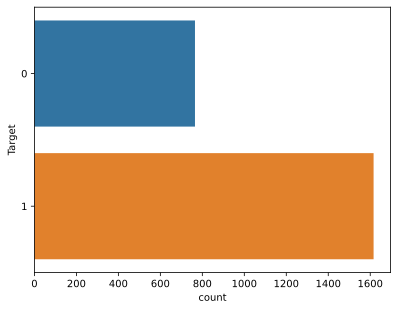

In [ ]:
#Target variable
sns.countplot(y=df_final['Target'])
plt.show()
##67%  churned drivers and 32 % drivers who are still working

##Numerical Columns

In [ ]:
#AGE
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(x=df_final["Age"],kde=True)
plt.subplot(122)
sns.boxplot(y=df_final["Age"])
plt.show()
mean,std=df_final["Age"].mean(),df_final["Age"].std()
print(f"mean age:{mean} ,std deviation:{std}")
#Age is approximately normal with a mean at 33.66 and std deviation at 5.93

NameError: name 'plt' is not defined

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(x=df_final["Income"],kde=True)
plt.subplot(122)
sns.boxplot(y=df_final["Income"])
plt.show()
mean,std=df_final["Income"].mean(),df_final["Income"].std()
print(f"mean age:{mean} ,std deviation:{std}")
#Income is approximately normal with a mean at 58484.07727845443 and std deviation at 26425.325402000042

NameError: name 'plt' is not defined

In [ ]:
#Total Business Value
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(x=df_final["Total Business Value"],kde=True)
plt.subplot(122)
sns.boxplot(y=df_final["Total Business Value"])
plt.show()
# mean,std=df_final["Total Business Value"].mean(),df_final["Total Business Value"].std()
# print(f"mean age:{mean} ,std deviation:{std}")
#Total buinsess value is severly right skewed

In [ ]:
df_final.columns

##Categorical Columns

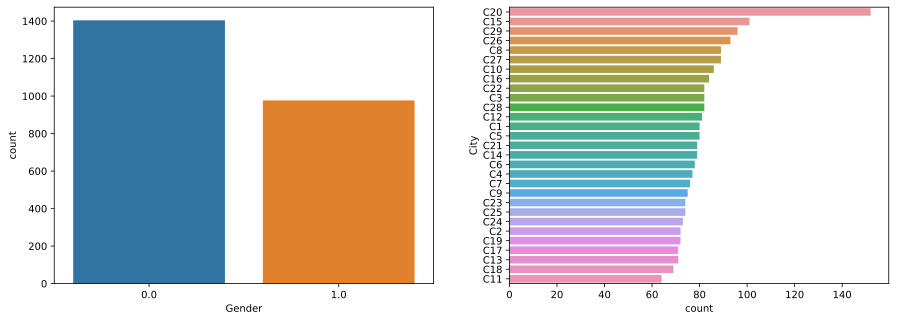

Top 3 cities


C20    152
C15    101
C29     96
Name: City, dtype: int64

In [ ]:
#Gender & City
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.subplot(121)
sns.countplot(x=df_final["Gender"])
plt.subplot(122)
l_s=df_final.groupby('City').size().sort_values().index[::-1]
sns.countplot(y=df_final['City'],order=l_s)
plt.show()
print("Top 3 cities")
df_final["City"].value_counts().head(3)

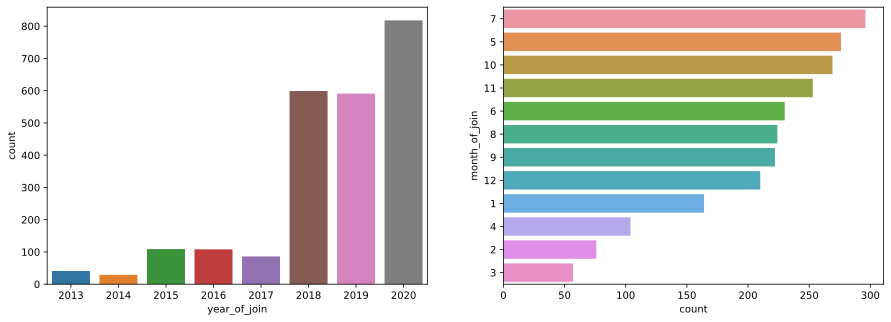

Top 3 months by join


7     296
5     276
10    269
Name: month_of_join, dtype: int64

In [ ]:

#Year and month of joining
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.subplot(121)
sns.countplot(x=df_final["year_of_join"])
plt.subplot(122)
l_s=df_final.groupby('month_of_join').size().sort_values().index[::-1]
sns.countplot(y=df_final['month_of_join'],order=l_s)
plt.show()
print("Top 3 months by join")
df_final["month_of_join"].value_counts().head(3)

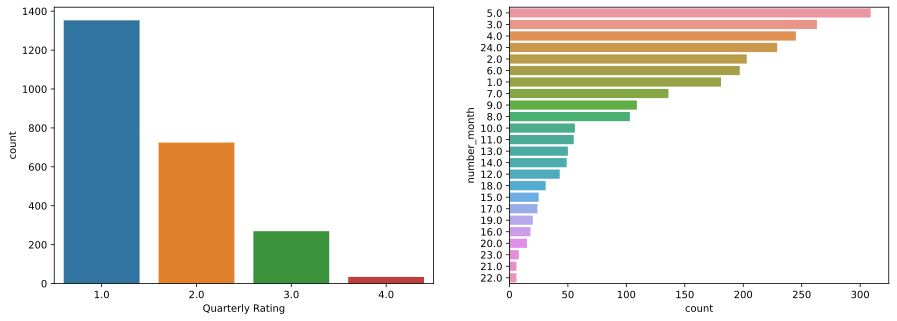

Top 3 month count


5.0    309
3.0    263
4.0    245
Name: number_month, dtype: int64

In [ ]:
#Quarterly Rating & number_month
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.subplot(121)
sns.countplot(x=df_final["Quarterly Rating"])
plt.subplot(122)
l_s=df_final.groupby('number_month').size().sort_values().index[::-1]
sns.countplot(y=df_final['number_month'],order=l_s)
plt.show()
print("Top 3 month count")
df_final["number_month"].value_counts().head(3)

<Axes: xlabel='Education_Level', ylabel='count'>

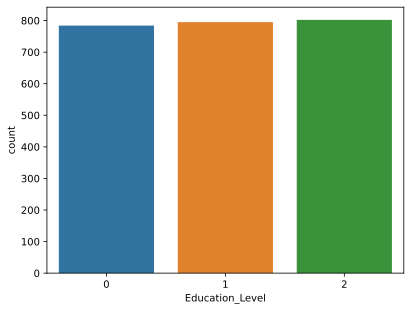

In [ ]:
sns.countplot(x=df_final["Education_Level"])

In [ ]:
df_final["Education_Level"].value_counts()#Education levels are equal

2    802
1    795
0    784
Name: Education_Level, dtype: int64

##Bivariate Analysis

[]

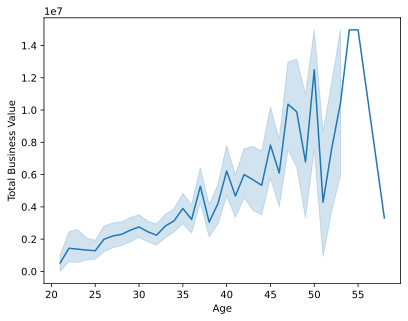

In [ ]:
#Age vs Business value
sns.lineplot(x=df_final["Age"],y=df_final["Total Business Value"])
plt.plot()#business value increases with age upto a cetrain age as we can see about 40-45 post which it is more uncertain

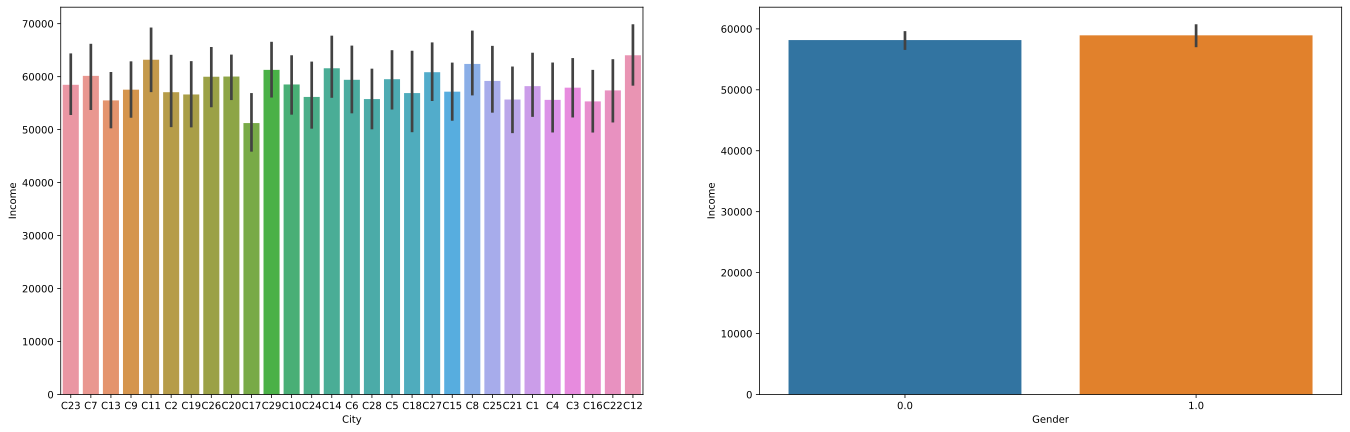

In [ ]:
#City  & Gender vs income
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(23, 7))
plt.subplot(121)
sns.barplot(x=df_final["City"],y=df_final["Income"])
plt.subplot(122)
sns.barplot(x=df_final["Gender"],y=df_final["Income"])
plt.show()
#C12,C11 ave the highest has he highest income
#not much diffence between income of male and female

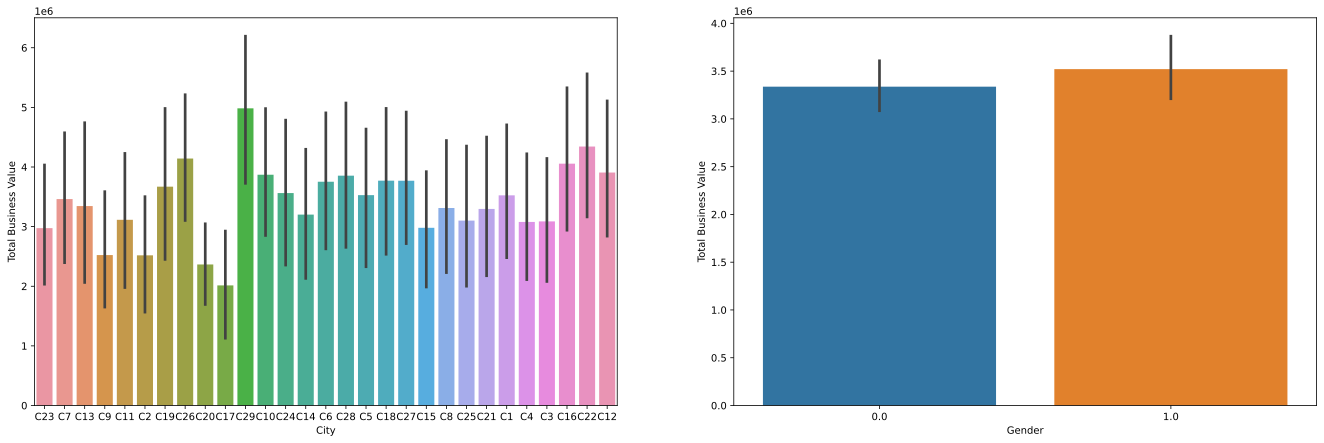

In [ ]:
#City  & Gender vs Buinsess value
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(23, 7))
plt.subplot(121)
sns.barplot(x=df_final["City"],y=df_final["Total Business Value"])
plt.subplot(122)
sns.barplot(x=df_final["Gender"],y=df_final["Total Business Value"])
plt.show()
#C12,C11 ave the highest has he highest income
#not much diffence between income of male and female

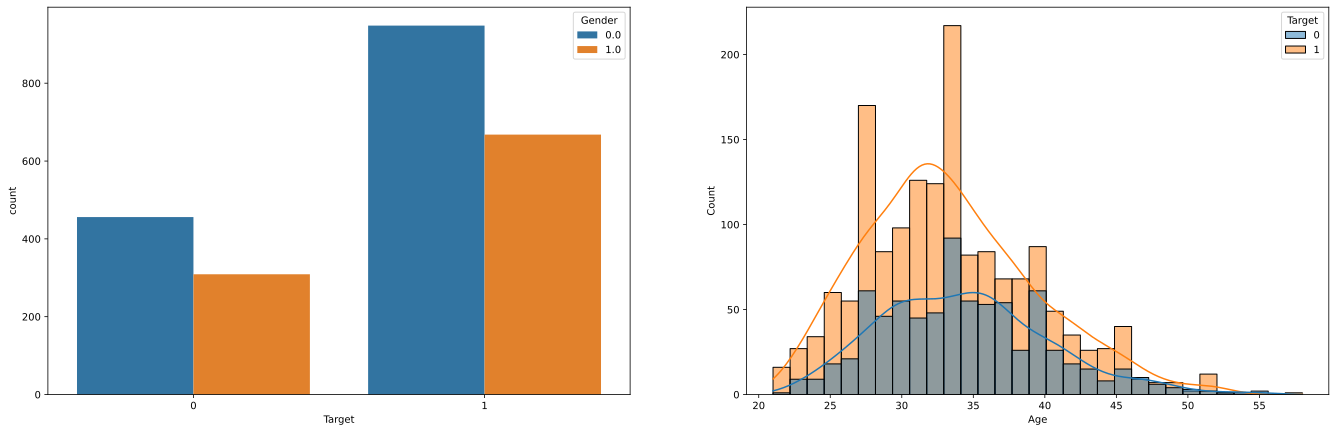

In [ ]:
#Target  Vs Gender & Age
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(23, 7))
plt.subplot(121)
sns.countplot(x=df_final['Target'],hue=df_final["Gender"])
plt.subplot(122)
sns.histplot(data=df_final, x="Age", hue="Target",kde=True)
plt.show()
#Not much difeerence between age groups
#Males are leaving more compared to females

##Encoding

In [ ]:
!pip install category_encoders
from category_encoders import TargetEncoder
tar=["month_of_join","year_of_join","City"]

for col in tar:
  te = TargetEncoder()
  df_final[col] = te.fit_transform(df_final[col], df_final['Target'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00


#Multivariate Analysis and correlation check

<ipython-input-41-de9601cebf6d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(method='pearson'), square=True,annot=True, cmap="Blues")


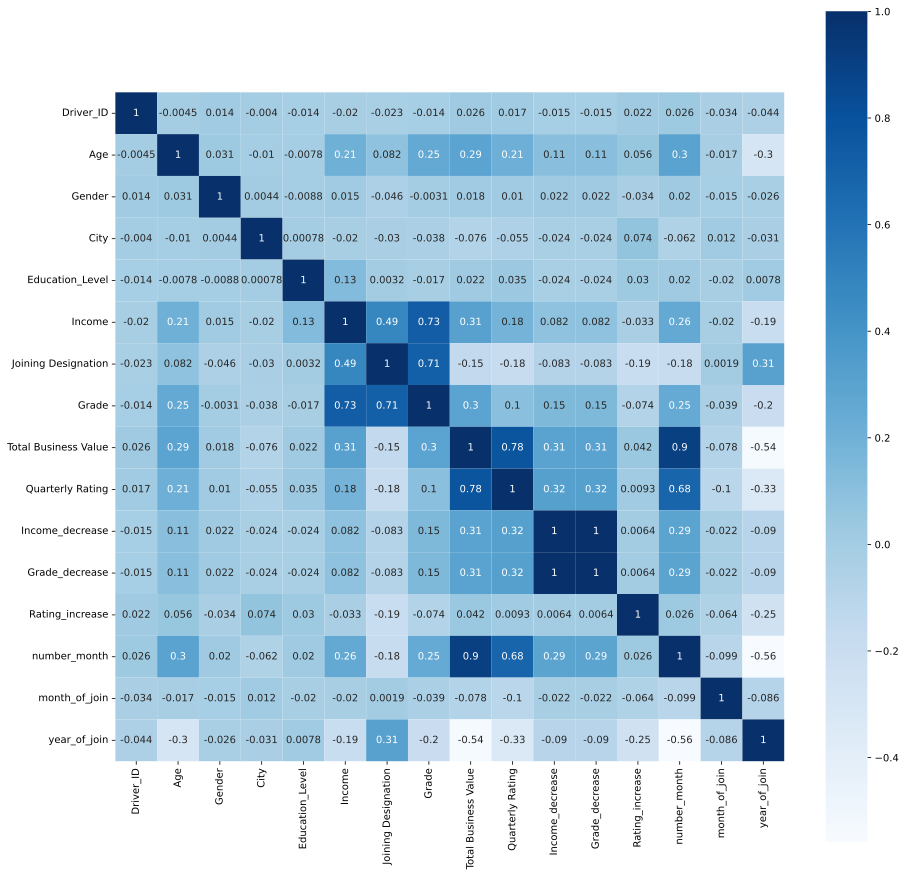

In [ ]:
#Heat map comparing all fields
plt.figure(figsize=(15, 15))
sns.heatmap(df_final.corr(method='pearson'), square=True,annot=True, cmap="Blues")
plt.show()

In [ ]:
df_final.drop('Grade',axis=1,inplace=True)
df_final.drop('Quarterly Rating',axis=1,inplace=True)
df_final.drop('Total Business Value',axis=1,inplace=True)
df_final.drop('Driver_ID',axis=1,inplace=True)
#dropping grade and quaterly rating columns as they are have high correlation(0.8,0.71) with other factors

#Model buliding

In [ ]:
#separating target
Y=df_final["Target"].astype(int)
X=df_final.drop("Target",axis=1)

columns=X.columns

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

**We dont need to do standardisation for decision tree models hence skipping standardisation**
**Note that you may need to standardise data for other models**

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a classifier object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# fit the regressor with X and Y data
train_scores = []
val_scores = []

for i in np.arange(1,20): # range of values of Lambda
  regressor = DecisionTreeClassifier(class_weight="balanced",criterion="entropy", max_depth=i)
  regressor.fit(X_train, y_train)
  train_score = regressor.score(X_train, y_train)
  val_score = regressor.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)


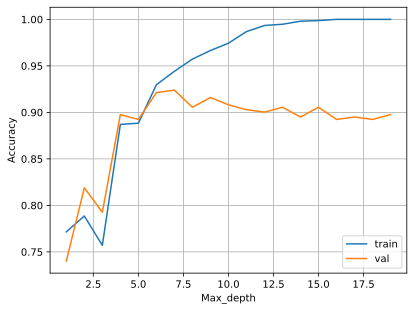

In [ ]:
plt.figure()
plt.plot(list(np.arange(1,20)), train_scores, label="train")
plt.plot(list(np.arange(1,20)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
Best_val=val_scores[np.argmax(val_scores)]##best validation score
best_max_depth=1+np.argmax(val_scores)
print(f"Best Max depth with Simple decision Tree is at {best_max_depth} with a validation accuracy of {Best_val}")

Best Max depth with Simple decision Tree is at 7 with a validation accuracy of 0.9238845144356955


In [ ]:
imp=regressor.feature_importances_
feat_imp={}
for i,j in zip(columns,imp):
  feat_imp[i]=j

dict(sorted(feat_imp.items(), key=lambda item: item[1],reverse=True))#we can drop columns with less importance i.e income decrease and grade decrease

{'number_month': 0.3577066003646637,
 'year_of_join': 0.26725869613033537,
 'month_of_join': 0.10432999209015818,
 'Income': 0.0753041451360196,
 'City': 0.059569157983259,
 'Age': 0.05429621219010287,
 'Rating_increase': 0.03925751569658349,
 'Education_Level': 0.0177092466753685,
 'Gender': 0.012539241858293944,
 'Joining Designation': 0.012029191875215381,
 'Income_decrease': 0.0,
 'Grade_decrease': 0.0}

In [ ]:
df_final.drop(['Income_decrease',"Grade_decrease"],axis=1,inplace=True)#dropped two columns as stated above
regressor = DecisionTreeClassifier(class_weight="balanced",criterion="entropy", max_depth=6)#checking accuracy after dropping columns with max depth 6
regressor.fit(X_train, y_train)
train_score = regressor.score(X_train, y_train)
val_score = regressor.score(X_val, y_val)
test_score=regressor.score(X_test, y_test)
print(f"After dropping two less important columns the validation accuracy comes out to be {val_score} and test accuracy of {test_score}")

After dropping two less important columns the validation accuracy comes out to be 0.9212598425196851 and test accuracy of 0.9308176100628931


In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train,y_train)
train_score_rf=clf.score(X_train,y_train)
test_score_rf=clf.score(X_test,y_test)
print(f"using a simple random forest without any tuning we get a train score of {train_score_rf} & test score of {test_score_rf}")
#as the difference is significant this might be over fitting

using a simple random forest without any tuning we get a train score of 1.0 & test score of 0.9287211740041929


In [ ]:
#tuning for RF
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':['balanced']}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


KeyboardInterrupt: ignored

In [ ]:
rf_random.best_params_#checking the best params

In [ ]:
rf = RandomForestClassifier(**rf_random.best_params_)
rf.fit(X_train,y_train)
train_score_rf=rf.score(X_train,y_train)
test_score_rf=rf.score(X_test,y_test)
print(f"using a first level tuned random forest we get a train score of {train_score_rf} & test score of {test_score_rf}")

In [ ]:
random_grid = {'n_estimators': np.arange(1900,2100,10),
               'max_features': ['auto'],
               'max_depth':np.arange(40,60,1),
               'min_samples_split': [2],
               'min_samples_leaf': [2],
               'bootstrap': ['False'],
               'class_weight':['balanced']}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_best=rf_random.best_params_#checking the best params
rf_best

In [ ]:
rf = RandomForestClassifier(**rf_best)
rf.fit(X_train,y_train)
train_score_rf=rf.score(X_train,y_train)
test_score_rf=rf.score(X_test,y_test)
print(f"using a tuned random forest we get a train score of {train_score_rf} & test score of {test_score_rf}")


In [ ]:
#lets check the confusion matrix ,precision ,recall, AUROC and AUPR
from sklearn.metrics import precision_score,recall_score,roc_auc_score,RocCurveDisplay,precision_recall_curve,confusion_matrix,ConfusionMatrixDisplay,average_precision_score,f1_score
y_pred_rf=rf.predict(X_test)
pre_rf=precision_score(y_test,y_pred_rf)
re_rf=recall_score(y_test,y_pred_rf)
print(f"The precision and recall for our tuned random forest are {pre_rf} & {re_rf}")

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Churn','no_Churn'])
cmd.plot()
# we in this case tried to maximise the accuracy instead of any one of the scores like accuracy or recall as we need maximum accuracy and I dont think any one of the metrics is more important

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_rf)
auc = metrics.roc_auc_score(y_test, y_pred_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
fpr, tpr, _ = metrics.precision_recall_curve(y_test,y_pred_rf)
auc = metrics.average_precision_score(y_test, y_pred_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Lets try using a boosting technique
#i am chosing xgboost for this
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators = 100,class_weights="balanced")
clf.fit(X_train,y_train)
train_score_rf=clf.score(X_train,y_train)
test_score_rf=clf.score(X_test,y_test)
print(f"using a simple XGboost without any tuning we get a train score of {train_score_rf} & test score of {test_score_rf}")


In [ ]:
# XGB_tuning
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              "class_weight":["balanced"]
              }

xgbclf = XGBClassifier(objective="binary:logistic", tree_method='hist')
clf = RandomizedSearchCV(estimator=xgbclf,
                        param_distributions=params,
                        scoring='accuracy',
                        n_iter=25,
                         cv=3,
                        n_jobs=-1,
                        verbose=1)

clf.fit(X_train, y_train)

In [ ]:
best_param_xgb=clf.best_params_
best_param_xgb['objective']="binary:logistic"
best_param_xgb['tree_method']="hist"
best_param_xgb

In [ ]:
# XGB_tuning_2nd step to look close to the values of the previous best results

params = {'max_depth': [3],
              'learning_rate': np.arange(0.05,0.15,0.010),
              'subsample': [0.9],
              'colsample_bytree': np.arange(0.5, 0.7, 0.05),
              'colsample_bylevel':[0.9],
              'n_estimators': np.arange(80,120,1),
              "class_weight":["balanced"]
              }

xgbclf = XGBClassifier(objective="binary:logistic", tree_method='hist')
clf = RandomizedSearchCV(estimator=xgbclf,
                        param_distributions=params,
                        scoring='accuracy',n_iter=25,
                        cv=3,
                        n_jobs=-1,
                        verbose=1)
clf.fit(X_train, y_train)

In [ ]:
best_param_xgb=clf.best_params_
best_param_xgb['objective']="binary:logistic"
best_param_xgb['tree_method']="hist"
best_param_xgb

In [ ]:
xgb_tun=XGBClassifier(**best_param_xgb)
xgb_tun.fit(X_train,y_train)
train_score_xgb=xgb_tun.score(X_train,y_train)
test_score_xgb=xgb_tun.score(X_test,y_test)
print(f"using a XGboost with tuning we get a train score of {train_score_xgb} & test score of {test_score_xgb}")

In [ ]:
#lets check the confusion matrix ,precision ,recall, AUROC and AUPR
y_pred_xgb=xgb_tun.predict(X_test)
pre_xgb=precision_score(y_test,y_pred_xgb)
re_xgb=recall_score(y_test,y_pred_xgb)
print(f"The precision and recall for our tuned  xgboost are {pre_xgb} & {re_xgb}")

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Churn','no_Churn'])
cmd.plot()
# we in this case tried to maximise the accuracy instead of any one of the scores like accuracy or recall as we need maximum accuracy and I dont think any one of the metrics is more important

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_xgb)
auc = metrics.roc_auc_score(y_test, y_pred_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
fpr, tpr, _ = metrics.precision_recall_curve(y_test,y_pred_xgb)
auc = metrics.average_precision_score(y_test, y_pred_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Comparing the scores from XGboost and random forest
cm = confusion_matrix(y_test, y_pred_rf, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Churn','no_Churn'])

cmd.plot()
cm = confusion_matrix(y_test, y_pred_xgb, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Churn','no_Churn'])
cmd.plot()

We can see that both of our tuned models give us similar scores for precision and recall with slightly better scores from the random forest

In [ ]:
fpr_1, tpr_1, _ = metrics.roc_curve(y_test,y_pred_rf)
auc_1 = metrics.roc_auc_score(y_test, y_pred_rf)
plt.plot(fpr_1,tpr_1,label="Random forest, auc="+str(auc_1))
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_xgb)
auc = metrics.roc_auc_score(y_test, y_pred_xgb)
plt.plot(fpr,tpr,label="Xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
fpr_2, tpr_2, _ = metrics.precision_recall_curve(y_test,y_pred_rf)
auc_2 = metrics.average_precision_score(y_test, y_pred_rf)
plt.plot(fpr_2, tpr_2,label="Random forest PR, auc="+str(auc_2))
fpr_3, tpr_3, _ = metrics.precision_recall_curve(y_test,y_pred_xgb)
auc_3 = metrics.average_precision_score(y_test, y_pred_xgb)
plt.plot(fpr_3, tpr_3,label="XGBoost PR, auc="+str(auc_3))
plt.legend(loc=4)
plt.show()

In [ ]:
#lets try lightGBM as well
from lightgbm import LGBMClassifier
Lgbm = LGBMClassifier(n_estimators = 100,class_weights="balanced")
Lgbm.fit(X_train,y_train)
train_score_Lgbm=Lgbm.score(X_train,y_train)
test_score_Lgbm=Lgbm.score(X_test,y_test)
print(f"using a simple lightgbm without any tuning we get a train score of {train_score_Lgbm} & test score of {test_score_Lgbm}")

[LightGBM] [Warning] Unknown parameter: class_weights
using a simple lightgbm without any tuning we get a train score of 1.0 & test score of 0.9329140461215933


In [ ]:
params = {'max_depth': np.arange(1,10,1),
              'learning_rate': np.arange(0.05,0.15,0.010),
              'n_estimators': np.arange(50,100,10),
              "class_weight":["balanced"]
              }

LGBM = LGBMClassifier()
LGBM_R = RandomizedSearchCV(estimator=LGBM,
                        param_distributions=params,
                        scoring='accuracy',n_iter=25,
                        cv=3,
                        n_jobs=-1,
                        verbose=1)
LGBM_R.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=25, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'learning_rate': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14]),
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([50, 60, 70, 80, 90])},
                   scoring='accuracy', verbose=1)

In [ ]:
LGBM_tun=LGBMClassifier(**LGBM_R.best_params_)
LGBM_tun.fit(X_train,y_train)
train_score_LGB=LGBM_tun.score(X_train,y_train)
test_score_LGB=LGBM_tun.score(X_test,y_test)
print(f"using a LGB with tuning we get a train score of {train_score_LGB} & test score of {test_score_LGB}")

using a LGB with tuning we get a train score of 0.9448456992777413 & test score of 0.9371069182389937


In [ ]:
y_pred_LGB=LGBM_tun.predict(X_test)
pre_LGB=precision_score(y_test,y_pred_LGB)
re_LGB=recall_score(y_test,y_pred_LGB)
print(f"The precision and recall for our tuned  LightGBM are {pre_LGB} & {re_LGB}")

NameError: ignored

In [ ]:
cm = confusion_matrix(y_test, y_pred_LGB, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Churn','no_Churn'])
cmd.plot()

In [ ]:
#the Light GBM above gives us slight better precision as compared to the other models

In [ ]:
# deploying the model using pickle
import pickle
pickle.dump(LGBM_tun,open("model.pkl","wb"))

In [ ]:
X_train

,Age,Gender,City,Education_Level,Income,Joining Designation,Income_decrease,Grade_decrease,Rating_increase,number_month,month_of_join,year_of_join
260,34.0,0.0,0.595377,0,26047,2,0,0,0,7.0,3,2020
635,36.0,0.0,0.709261,0,73273,2,0,0,0,5.0,1,2020
984,34.0,0.0,0.709261,2,50547,3,0,0,-1,5.0,8,2020
2098,26.0,1.0,0.654376,2,36191,1,0,0,0,6.0,5,2020
1110,35.0,0.0,0.774067,0,55638,3,0,0,0,1.0,5,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
981,31.0,0.0,0.674162,1,46239,1,0,0,0,5.0,9,2018
2033,28.0,1.0,0.706553,0,14820,1,0,0,1,5.0,7,2020
1906,49.0,1.0,0.634237,0,53572,1,0,0,1,5.0,8,2015
158,34.0,1.0,0.607789,2,62199,2,0,0,1,4.0,4,2020
